<a href="https://colab.research.google.com/github/Zuzed22/Machine-Learning/blob/main/Ejercicios_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio 1

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [29]:
import pandas as pd

In [30]:
datos = pd.read_csv('/content/prestacar.csv')

In [31]:
X = datos.drop(columns='moroso', axis=1)
y = datos.moroso

In [32]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=5)

In [35]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validación es de: 0.9059315390645414


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9153890824622531
Precisión de validación: 0.9128995732079087


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10478     1]
 [  999     3]]


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

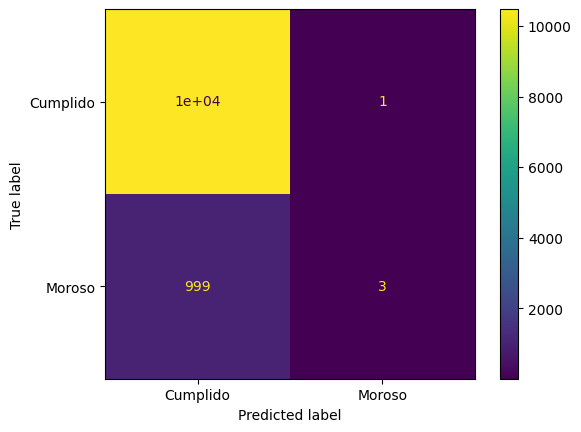

In [41]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();